<a href="https://colab.research.google.com/github/evelyn-zhu/CS3262-Resources/blob/main/HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unstructured Data Analytics HW1

Name: Junyi Zhu

Andrew ID: Junyizh2

Collaborators (if none, say "none"; do *not* leave this blank): gpt


Reminder: you should not be sharing code.

**Reminder:** As stated in Lecture 1, homework assignments this semester will be submitted as PDFs and, in particular, we will not be re-running your code. Please make sure that you have run all your code cells so that the code cell outputs are actually displayed. To save your Jupyter notebook as a PDF, we recommend simply using your browser's print functionality and using that to print/save the notebook as a PDF.

**Warning: make sure your compute environment is set up first.** This homework assignment assumes that you have already installed Anaconda Python 3 and spaCy. Instructions for installing these are part of the tutorial [here](https://www.andrew.cmu.edu/user/georgech/95-865/Anaconda,%20Jupyter,%20and%20spaCy%20setup%20tutorial.pdf).

### Instructions
1. Fill in your name, Andrew ID, and collaborators above.
2. Fill in the code/text blocks to answer each question.
3. Do *not* change any of the existing code provided.
4. Run the entire notebook *before* submitting it (as a PDF, as stated above). Again, we will *not* be re-running your code.

### [Problem 1] Basic Text Analysis [45 pts]

This problem involves a mix of Python review (loops, conditionals, counters/dictionaries, sorting) and learning to work with a sizable collection of text data.

You will be looking at a phenomenon of "natural languages" (i.e., human languages, such as English) called *Zipf's law*, which relates how frequently a word occurs in a language to its "rank" (the word with rank 1 is the most frequently occurring word, the word with rank 2 is the second most frequently occurring word, etc). Roughly speaking, the word with rank 1 appears twice as likely as the word with rank 2, and the three times as likely as the word with rank 3, and so forth. (Some details on Zipf's law can be found on [Wikipedia](https://en.wikipedia.org/wiki/Zipf%27s_law).) In this problem, you are going to check whether Zipf's law holds for a real dataset of text documents.

The dataset we look at is a collection of the 100 most popular books downloaded from the [Gutenburg Project](https://www.gutenberg.org/browse/scores/top). These 100 books form the corpus that we consider for this problem. Each file contains the text of a book. We will read in all 100 books.

Hint: To list all files that match a certain pattern, you can use the `glob` package. Here's an example usage:

```python
import glob
print(glob.glob('./HW1_Dataset/*.txt'))
```

**(a) Warm-up/basic Python review [15 pts across subparts].** This part serves as a warm-up, getting you familiar with the kind of code we will be writing in this class. Note that throughout part (a), your code should **not** be using spaCy.

**Subpart i [5 pts].** Write a loop that iterates through all 100 books; for each book, print out its corresponding file name and also how long the book is in terms of string length (meaning that if we load in the book as a string, we compute the length of the string using the built-in Python function `len`; this is just counting the number of characters).

**Please do not actually print out the contents of each book since many of the books are extremely long, and by printing out all the books' contents, you'll end up creating a Jupyter notebook that has a massive file size (and when you save it as a PDF, the PDF will have a crazy number of pages).**

Hint: When debugging your code, you may want to first make sure your code runs on a few of the books rather than all 100 (for example, you can start by only having 3 of the text files in `HW1_Dataset`). Once you're confident that your solution is correct on a few text files, then run on all of them! This is a standard approach to debugging code that is meant to handle large datasets.

Your output should look like (although there should be 100 books rather than 3 as shown below; also, the ordering of the books might be different on your machine):

```
./HW1_Dataset/War and Peace by graf Leo Tolstoy (251).txt 3227580
./HW1_Dataset/Democracy in America — Volume 1 by Alexis de Tocqueville (147).txt 1148435
./HW1_Dataset/Frankenstein; Or, The Modern Prometheus by Mary Wollstonecraft Shelley (501).txt 441034
```

In [51]:
########################################################################
######################### Write your code here #########################
########################################################################
from google.colab import drive
drive.mount('/content/drive')

# Change to the directory where your dataset is located
%cd /content/drive/MyDrive/HW1/HW1_Dataset

import glob
allBooks = glob.glob('./*.txt')

# Iterate through each book file
for book in allBooks:
    # Print the file name and the length of the book's content
    print(f"./HW1_Dataset/{book} {len(open(book).read())}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/HW1/HW1_Dataset
./HW1_Dataset/./Adventures of Huckleberry Finn by Mark Twain (401).txt 593962
./HW1_Dataset/./Alice's Adventures in Wonderland by Lewis Carroll (564).txt 163817
./HW1_Dataset/./Beowulf An Anglo-Saxon Epic Poem (403).txt 292953
./HW1_Dataset/./A Tale of Two Cities by Charles Dickens (425).txt 776702
./HW1_Dataset/./A Christmas Carol in Prose; Being a Ghost Story of Christmas by Charles Dickens (265).txt 177758
./HW1_Dataset/./Anne of Green Gables by L. M.  Montgomery (114).txt 580635
./HW1_Dataset/./A Study in Scarlet by Arthur Conan Doyle (163).txt 262340
./HW1_Dataset/./Alice in Wonderland by Lewis Carroll and Alice Gerstenberg (126).txt 104079
./HW1_Dataset/./A History of Spanish Literature by James Fitzmaurice-Kelly (109).txt 765918
./HW1_Dataset/./Autobiography of Benjamin Franklin by Benjamin Franklin (247).txt 4586

**Subpart ii [5 pts].** Copy and paste your code from **subpart i** into the code cell below. Then in the code cell below, modify the code so that it prints out the top 15 longest books (in terms of raw string length, which is what you had already computed). In particular, please write your code so that the printout is of the following format:

```
1. <number of characters in longest text file> <filename of longest text file>
2. <number of characters in 2nd longest text file> <filename of 2nd longest text file>
...
15. <number of characters in 15th longest text file> <filename of 15th longest text file>
```

Note: only print out information for the top 15 books in the format above; please do not repeat printing what we asked you to print in **subpart i**.

In [6]:
########################################################################
######################### Write your code here #########################
########################################################################
# import glob

# List all text files in the HW1_Dataset directory
# allBooks = glob.glob('./HW1_Dataset/*.txt')

book_lengths = []
# Iterate through each book file
for book in allBooks:
    # Open the book file and read its contents
    with open(book) as file:
        contents = file.read()

    book_lengths.append((len(contents), book))

# Sort the list of tuples by the first element (length) in descending order
book_lengths_sorted = sorted(book_lengths, key=lambda x: x[0], reverse=True)

# Print out the top 15 longest books
for i in range(15):
    length, filename = book_lengths_sorted[i]
    print(f"{i+1}. <{length}> <{filename}>")

1. <5465100> <./The Complete Works of William Shakespeare by William Shakespeare (132).txt>
2. <4351846> <./The King James Version of the Bible (132).txt>
3. <3254333> <./Les Misérables by Victor Hugo (165) (Unicode Encoding Conflict).txt>
4. <3227580> <./War and Peace by graf Leo Tolstoy (251).txt>
5. <3033575> <./Essays of Michel de Montaigne — Complete by Michel de Montaigne (205).txt>
6. <2643849> <./The Count of Monte Cristo, Illustrated by Alexandre Dumas (160).txt>
7. <1534140> <./Ulysses by James Joyce (282).txt>
8. <1378627> <./My Secret Life, Volumes I. to III. by Anonymous (157).txt>
9. <1238569> <./Moby Dick; Or, The Whale by Herman Melville (413).txt>
10. <1231784> <./Leviathan by Thomas Hobbes (417).txt>
11. <1214387> <./The Republic by Plato (246).txt>
12. <1200021> <./The History of the Peloponnesian War by Thucydides (122).txt>
13. <1175588> <./The Iliad by Homer (256).txt>
14. <1167141> <./The Federalist Papers by Alexander Hamilton and John Jay and James Madison (11

**Subpart iii [5 pts].** You should find that some of the books are quite long. Processing very long books will be problematic with spaCy, so we will want to chop up long books into pieces. Note that later on in the course, we shall see that chopping up large amounts of data into small pieces or "batches" is in fact quite common in machine learning since for massive datasets, we often cannot store them in their entirety on a CPU or GPU for processing all at once.

As a toy example, suppose that a book's text is `'cat dog shark spam eggs'` and we want to split it up into batches where each batch has at most 3 words. Then we could split up the book's text into two batches/pieces: `'cat dog shark'` and `'spam eggs'`.

We have provided code for you to do this below.

In [7]:
import numpy as np

def split_into_batches(book_text, max_num_words_per_batch):
    words_split_on_spaces = book_text.split(' ')
    num_book_pieces = int(np.ceil(len(words_split_on_spaces) / max_num_words_per_batch))
    batches = []
    for piece_idx in range(num_book_pieces):
        start_idx = piece_idx * max_num_words_per_batch
        end_idx = (piece_idx + 1) * max_num_words_per_batch
        if end_idx > len(words_split_on_spaces):
            end_idx = len(words_split_on_spaces)
        book_piece = ' '.join(words_split_on_spaces[start_idx:end_idx])
        batches.append(book_piece)
    return batches

print(split_into_batches('cat dog shark spam eggs', 3))

['cat dog shark', 'spam eggs']


Now write a loop that goes through all 100 books again. However, for each book, split it up into batches so that each batch has at most 10000 words. In this case, how many batches are there total across all 100 books? Please write code that computes this number of batches. Your code should print out the following (with the correct total number of batches):

```
Total number of batches: <total number of batches across all 100 books>
```

In [8]:
########################################################################
######################### Write your code here #########################
########################################################################

# Initialize the total number of batches
total_batches = 0

# Iterate over each book file
for book in allBooks:
    with open(book) as file:
        contents = file.read()
        # Get the batches for the current book
        batches = split_into_batches(contents, 10000)
        # Update the total number of batches
        total_batches += len(batches)

# Print out the total number of batches
print(f"Total number of batches: {total_batches}")


Total number of batches: 1246


**(b) [10 pts]** Now we will finally use spaCy. Note that for this problem, you don't actually need `spaCy`'s named entity recognition or grammatical parsing. Turning these elements off when you instantiate the `nlp` object can substantially speed up your code. To make sure these are off when instantiating the `nlp` object, call:

```python
nlp = spacy.load('en_core_web_sm', disable=['ner', 'parser'])
```

**Throughout this problem, do not remove stopwords.**

Build a term frequency (raw counts) table that is for all 100 books. Specifically, building on your solution to part (a)-subpart iii, read in a single book at a time and for each book, do the following:

  1. Split it up into batches where each batch has at most 10000 words.
  2. For each batch:
    1. Process the batch by separating and lemmatizing the words
    2. Count the number of times each lemma appears and add these to the frequency table. For simplicity, **do not convert lemmas to lowercase**. (Note that we use raw counts as the "frequency"--do not do any division.) Also, as we explain below, we will only count lemmas that are alphabetic.

Note that just as we had said in part (a): do **not** print out the complete contents of every book since doing so will result in a Jupyter notebook file that is massive.

After looping through all 100 books, you should have the term frequency table for the entire corpus (importantly, the frequency table should not just be for a single book; it should be for all 100 books). Sort the table and print the top 50 most frequent words, along with their frequencies and ranks. Don't worry about ties (for example, if multiple things have the same frequency, it's fine if your solution breaks ties arbitrarily in the sorting).

Note: When counting the lemmas, only include lemmas that consist of alphabetic letters (a-z and A-Z). You can do this with what's called a *regular expression*. For example, to check whether the words "will.i.am" or "Tesla" are alphabetic, you would do the following:

```python
import re  # regular expression package
if re.match('[a-zA-Z]+$', 'will.i.am'):
    print('will.i.am consists only of alphabetic letters!')
if re.match('[a-zA-Z]+$', 'Tesla'):
    print('tesla consists only of alphabetic letters!')
```

In [9]:
import spacy
from collections import Counter
import re

# Load spaCy's small English model
nlp = spacy.load('en_core_web_sm', disable=['ner', 'parser'])

# Precompile the regular expression
alpha_only = re.compile('^[a-zA-Z]+$').match

frequency_table = Counter()

# Process the batch using spaCy for lemmatization
def process_batch(batch):
    # Process the batch of text
    doc = nlp(batch)
    # Use a list comprehension to filter and count tokens
    frequency_table.update(
        [token.lemma_ for token in doc if alpha_only(token.text)]
    )

# Integrate with existing loop that processes each book
for book in allBooks:
    with open(book, 'r', encoding='utf-8') as file:
        contents = file.read()
        batches = split_into_batches(contents, 10000)
        for batch in batches:
            process_batch(batch)

# Print the top 50 lemmas
most_common_50 = frequency_table.most_common(50)

for rank, (lemma, frequency) in enumerate(most_common_50, 1):
    print(f"{rank}. {lemma}: {frequency}")


1. the: 702465
2. and: 435424
3. be: 430228
4. of: 386347
5. to: 324409
6. I: 255129
7. a: 233423
8. in: 204252
9. he: 193622
10. that: 159010
11. have: 158115
12. it: 135431
13. his: 108536
14. you: 102595
15. with: 101227
16. they: 96821
17. not: 96098
18. for: 95320
19. as: 90702
20. she: 78524
21. but: 75599
22. my: 73983
23. do: 68754
24. at: 64947
25. on: 62833
26. by: 61274
27. this: 61240
28. we: 60300
29. which: 58868
30. all: 58636
31. say: 58348
32. from: 50095
33. so: 47999
34. or: 47810
35. her: 42838
36. one: 41123
37. man: 39585
38. their: 38418
39. what: 37851
40. no: 37808
41. there: 37209
42. will: 36772
43. if: 34898
44. go: 33897
45. when: 33587
46. an: 32517
47. come: 32358
48. see: 32024
49. who: 30934
50. would: 30872


**(c) [10 pts]** Visualize the frequency table by plotting a **raw scatter plot** (put frequency as the y-axis and rank as the x-axis), and a **log-log plot** (use logarithmic scales on both the x- and y- axes). Note that this should be for all words and not only the top 50. As before, for the ranks, do not worry about ties, i.e., break ties arbitrarily.

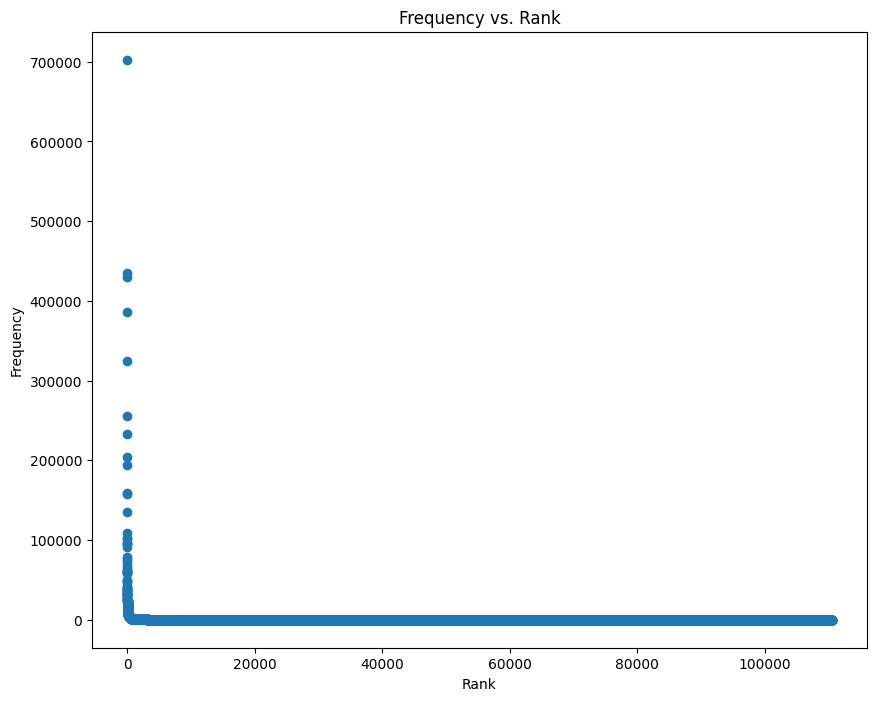

In [10]:
# Raw scatter plot
########################################################################
######################### Write your code here #########################
########################################################################
import matplotlib.pyplot as plt
import numpy as np

# Extract ranks and frequencies
ranks = range(1, len(frequency_table) + 1)
frequencies = [freq for (word, freq) in frequency_table.most_common()]

# Raw scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(ranks, frequencies)
plt.title('Frequency vs. Rank')
plt.xlabel('Rank')
plt.ylabel('Frequency')
plt.show()



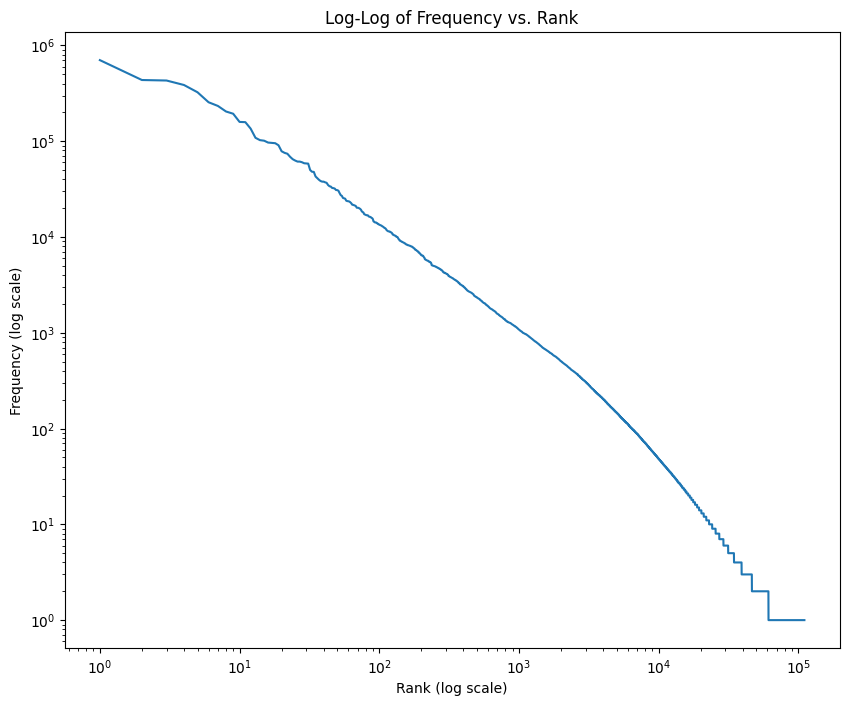

In [11]:
# Log-log plot
########################################################################
######################### Write your code here #########################
########################################################################

# Log-log plot
plt.figure(figsize=(10, 8))
plt.loglog(ranks, frequencies)
plt.title('Log-Log of Frequency vs. Rank')
plt.xlabel('Rank (log scale)')
plt.ylabel('Frequency (log scale)')
plt.show()

**(d) [10 pts across subparts]** Let's now try to make sense of the very last plot in part **(c)**. Zipf's law states that term frequency is governed by a power law, i.e. the relationship between term frequency and rank can be approximated by $f(r) = cr^{-1}$, where $f(r)$ is the frequency of the term at rank $r$, $r$ is the rank of a term, and $c$ is a constant that is approximately 0.1*(corpus size) for English.

Please answer the following questions:

**Subpart i [2 pts].** What do you observe in the log-log plot above? Is this consist with the power law?

Your text answer (for this question, your answer is *not* code):
**The plot shows an approximate straight line with a negative slope, this is consistent with the power law and hence with Zipf's law.**

**Here, in the center,**

y = 10^4 corresponds to x = 10^2

y = 10^3 corresponds to x = 10^3

y = 10^2 corresponds to x = 10^4

The slope of the line on the log-log plot represents the exponent a in the equation. For true Zipfian distributions, this is close to -1. The top and bottom ends might deviate more due to common words being higher/lower than predicted, but the middle is pretty consistent.

**Subpart ii [4 pts].** Think of the corpus as a (large) unigram bag of words. Following the analogy from lecture, imagine drawing a single word from this big bag (note that we are assuming that we've lemmatized the words and also filtered out non-alphabetic words; thus what remains in the bag are actually alphabetic lemmas). What is the probability of drawing one of the 4 most frequent alphabetic lemmas? What is the probability of drawing one of the 50 most frequent alphabetic lemmas? Answer these two questions using code rather than just entering in the final answers as numbers.

In [16]:
print('Probability of drawing one of the 4 most frequent alphabetic lemmas: ')
########################################################################
######################### Write your code here #########################
########################################################################
total_words = sum(frequency_table.values())
top_4_sum_freq = sum(freq for word, freq in frequency_table.most_common(4))
probability_top_4 = top_4_sum_freq / total_words
print(probability_top_4)

print('Probability of drawing one of the 50 most frequent alphabetic lemmas: ')
########################################################################
######################### Write your code here #########################
########################################################################
top_50_sum_freq = sum(freq for word, freq in frequency_table.most_common(50))
probability_top_50 = top_50_sum_freq / total_words
print(probability_top_50)


Probability of drawing one of the 4 most frequent alphabetic lemmas: 
0.16211773373399146
Probability of drawing one of the 50 most frequent alphabetic lemmas: 
0.48201198241747084


**Subpart iii [4 pts].** What proportion of the alphabetic lemmas occur only once? What proportion of the alphabetic lemmas occur fewer than 10 times?

In [18]:
print("Occur only once: ")
########################################################################
######################### Write your code here #########################
########################################################################

# Calculate the total number of unique lemmas
total_lemmas = len(frequency_table)

# Count lemmas that occur only once
lemmas_occur_once = sum(1 for word, freq in frequency_table.items() if freq == 1)

# Count lemmas that occur fewer than 10 times
lemmas_occur_fewer_than_10 = sum(1 for word, freq in frequency_table.items() if freq < 10)

# Calculate proportions
proportion_once = lemmas_occur_once / total_lemmas
proportion_fewer_than_10 = lemmas_occur_fewer_than_10 / total_lemmas
print(proportion_once)

print("Occur fewer than 10 times: ")
########################################################################
######################### Write your code here #########################
########################################################################
print(proportion_fewer_than_10)


Occur only once: 
0.44752701015255986
Occur fewer than 10 times: 
0.7815570877897823


### [Problem 2] Entity Recognition and Pointwise Mutual Information (PMI) [50 pts]
By using the entity recognition system in `spaCy`, let's identify named entities from newspaper articles. You'll be using Reuters corpus which contains more than ten thousand newspaper articles. To run the code below, you need to download the Reuters dataset. To do so, in a terminal/command line (recall that you can open a terminal from Jupyter's webpage that shows all the files, which by default is [http://localhost:8888/tree](http://localhost:8888/tree)), start up Python and enter:

```python
import nltk
nltk.download('reuters')
```

Then proceed to the problem subparts below.

Note that in this problem you will need named entity recognition but not grammatical parsing. Hence, you will want to instantiate the nlp object by calling:

```python
nlp = spacy.load('en_core_web_sm', disable=['parser'])
```


In [47]:
import nltk
nltk.download('reuters')
nlp = spacy.load('en_core_web_sm', disable=['parser'])

[nltk_data] Downloading package reuters to /root/nltk_data...
[nltk_data]   Package reuters is already up-to-date!


**(a) [15 pts]** Draw a bar chart in which one of the axes shows entity labels and the other shows the frequency of the corresponding label. Use the variables `reuters_nlp` and `label_counter` provided in the code below.

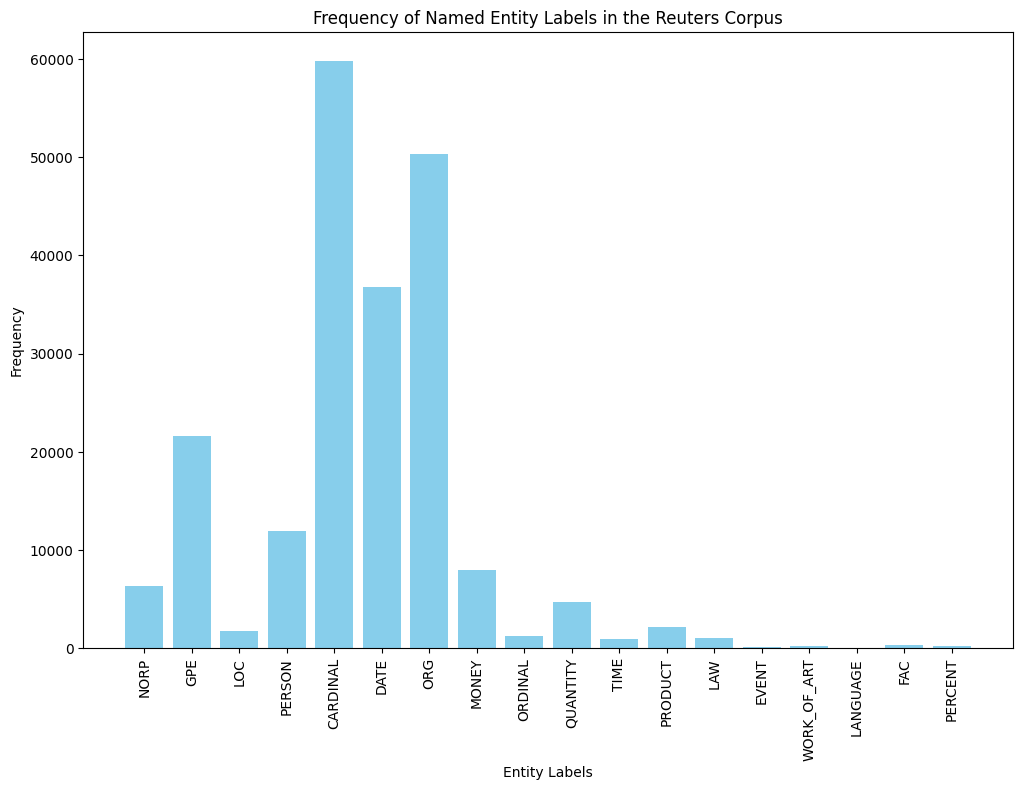

In [48]:
import matplotlib.pyplot as plt
from collections import Counter
from nltk.corpus import reuters
import re
import spacy
nlp = spacy.load('en_core_web_sm', disable=['parser', 'tagger'])
reuters_fileids = reuters.fileids()  # hint: when first debugging, consider looking at just the first few
reuters_nlp = [nlp(re.sub('\s+',' ', reuters.raw(i)).strip()) for i in reuters_fileids]
label_counter = Counter()

########################################################################
######################### Write your code here #########################
########################################################################

for doc in reuters_nlp:
    label_counter.update([ent.label_ for ent in doc.ents])

# Prepare data for plotting
labels, counts = zip(*label_counter.items())

# Plotting
plt.figure(figsize=(12, 8))
plt.bar(labels, counts, color='skyblue')
plt.xlabel('Entity Labels')
plt.ylabel('Frequency')
plt.title('Frequency of Named Entity Labels in the Reuters Corpus')
plt.xticks(rotation=90)
plt.show()


**(b) [15 pts]** Now list the top 10 most frequently occurring entities (entity text and the number of occurence) with label `ORG` (organization). Separately list the top 10 most frequently occurring entities with label `GPE` (geopolitical entity such as countries, cities, states) respectively. **In both cases, please convert the entity names to lowercase first before computing the top 10.**

Here, when counting the (raw count) frequency, we need to count how many articles have an entity with the desired property. For every article, we add 1 if the article has the entity and 0 otherwise.

In [49]:
########################################################################
######################### Write your code here #########################
########################################################################
from collections import defaultdict, Counter

# Initializing default dictionaries with set as the default factory
org_entities = defaultdict(set)
gpe_entities = defaultdict(set)

# Process each article and extract entities
for i, doc in enumerate(reuters_nlp):
    for ent in doc.ents:
        if ent.label_ == "ORG":
            # Add the lowercase entity text to the set for the article
            org_entities[i].add(ent.text.lower())
        elif ent.label_ == "GPE":
            # Add the lowercase entity text to the set for the article
            gpe_entities[i].add(ent.text.lower())

# Flatten the sets into lists to count overall frequency
org_counter = Counter([entity for entities in org_entities.values() for entity in entities])
gpe_counter = Counter([entity for entities in gpe_entities.values() for entity in entities])

# Get the top 10 most frequent ORG and GPE entities
top_10_org = org_counter.most_common(10)
top_10_gpe = gpe_counter.most_common(10)

# Print the top 10 ORG and GPE entities
print("Top 10 ORG Entities:")
for entity, count in top_10_org:
    print(f"{entity}: {count}")

print("\nTop 10 GPE Entities:")
for entity, count in top_10_gpe:
    print(f"{entity}: {count}")


Top 10 ORG Entities:
cts: 1115
reuters: 444
the securities and exchange commission: 248
ec: 231
fed: 230
treasury: 228
cts net: 179
the u.s. agriculture department: 170
usda: 154
the bank of england: 143

Top 10 GPE Entities:
u.s.: 1631
japan: 579
the united states: 383
u.k.: 297
canada: 295
new york: 251
west germany: 236
washington: 230
london: 216
brazil: 201


**(c) [20 pts]** Give the top 50 `GPE` (countries, cities, states) entities that have the highest Pointwise Mutual Information (PMI) values with regard to the `ORG` (organization) entity **'opec'** (your list of this top 50 should be ranked in decreasing PMI value). Did you find any unexpected results? If so, why do you think it happened? If you found some of the results to be unsurprisingly, how come? **Just like in the previous part, please convert entity names to lowercase in your analysis.**

Hint 1: As in lecture, when computing PMI, we will compute probabilities by counting the number of documents where entities occur or co-occur.  For example, $P('opec') = \frac{number \ \ of \ \ documents \ \ containing \ \ 'opec'}{number \ \ of \ \ documents}$.  

Hint 2: To compute this ranking, you do not have to compute the full PMI equation.

In [50]:
from math import log
# Initialize counters
opec_counter = 0
gpe_counter = Counter()
co_occurrence_counter = Counter()

# Count occurrences and co-occurrences in the documents
for doc in reuters_nlp:
    has_opec = 'opec' in [ent.text.lower() for ent in doc.ents if ent.label_ == 'ORG']
    gpe_entities = [ent.text.lower() for ent in doc.ents if ent.label_ == 'GPE']

    if has_opec:
        opec_counter += 1
        co_occurrence_counter.update(gpe_entities)

    gpe_counter.update(gpe_entities)

# Calculate the probabilities based on the counters
total_docs = len(reuters.fileids())
gpe_probabilities = {gpe: count / total_docs for gpe, count in gpe_counter.items()}
opec_probability = opec_counter / total_docs
co_occurrence_probabilities = {gpe: count / total_docs for gpe, count in co_occurrence_counter.items()}

# Calculate PMI scores using these probabilities
pmi_scores = Counter()
for gpe in gpe_probabilities:
    # Use gpe as the key
    if gpe in co_occurrence_probabilities and co_occurrence_probabilities[gpe] > 0:
        # Compute the PMI score using natural log
        pmi = log(co_occurrence_probabilities[gpe] / (gpe_probabilities[gpe] * opec_probability))
        pmi_scores[gpe] = pmi

# Sort the PMI scores from largest to smallest
sorted_pmi_scores = pmi_scores.most_common()

# Print out the GPE entities with the highest PMI with 'opec'
print("Top GPE entities by PMI with 'opec':")
for gpe, pmi_score in sorted_pmi_scores[:50]:
    print(f"{gpe}: {pmi_score:.6f}")

Top GPE entities by PMI with 'opec':
brent: 4.482169
ula fields: 4.482169
emirates: 4.482169
the lake charles: 4.482169
bethesda: 4.482169
franco: 4.482169
gabon: 4.482169
opec: 4.482169
saudi arabia reiterates commitment to: 4.482169
yanbu: 4.482169
el salado: 4.482169
aguarico: 4.482169
ras tanurah: 4.482169
ju'aymah: 4.482169
jubail: 4.482169
tripoli: 4.482169
doha: 4.482169
guayaquil: 4.482169
tihamah: 4.482169
redoglia: 4.482169
carrington: 4.482169
materialy: 4.482169
vienna: 4.348637
riyadh: 4.328018
dunham: 4.328018
saudi arabia's: 4.224340
statfjord: 4.194487
quito: 4.076704
kahan: 4.076704
ecuador: 4.021215
dubai: 3.996661
qatar: 3.971343
balao: 3.971343
nigeria: 3.906804
saudi arabia: 3.841665
nordic: 3.789021
caracas: 3.789021
oseberg: 3.789021
la: 3.789021
libya: 3.720029
petromin: 3.565878
kuwait: 3.542161
the united arab emirates: 3.533088
venezuela: 3.511811
lago agrio: 3.383556
lagos: 3.383556
norway: 3.229406
jakarta: 3.229406
iceland: 3.095874
alexandria: 3.095874


Your text answer (for this question, your answer is *not* code):
The unexpected result in the data is that all the top GPE entities have the exact same PMI score when associated with 'opec'. This is unusual because it suggests that each of these entities is equally likely to co-occur with 'opec' across different documents, which is statistically improbable in a large, varied news corpus.

The Reuters corpus might have a specific collection of articles where 'opec' is mentioned in a very consistent context, particularly in articles that are exclusively about the oil industry.

On the other hand, it's unsurprising to see these particular entities associated with 'opec' because they are directly related to the oil industry, which is 'opec's area of influence. Places like 'brent', and oil-producing countries and cities, are naturally mentioned in discussions about oil pricing, policies, and economics, which are 'opec's primary concerns.

### [Problem 3] Questionnaire [5 pts]

Please provide feedback! To receive the 5 points, be sure to enter your Andrew ID correctly in this Google form: https://forms.gle/8heZamsAnE8S7VTWA